#Assignment5: Ensemble learning

##Exercise1

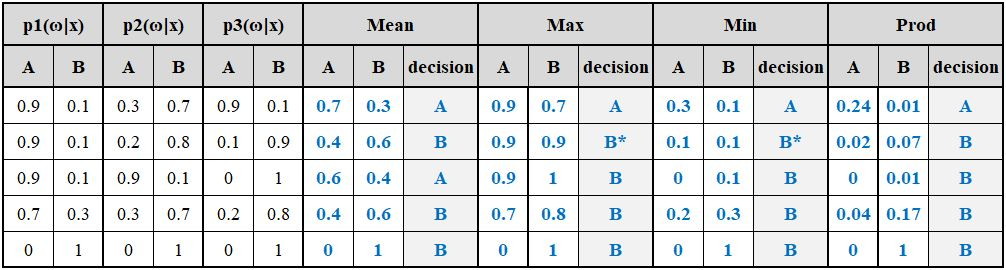

###Answer.1.

The cells indicated by starts have equal probabilities. In this case, we would go for class B based on other criteria like mean. Also, we figured out that the decision made by Min and Max estimators are always equal. The reason is the output of an estimator that is minimum for a class leads to the maximum value in the other class since they are complementary. Besides, in this example, the output of Min and Max are the same as Prod.

##Exercise2

###Answer.2.a.1

In [ ]:
#what is the probability that all three doctors give the correct answer? 
p_three_doctor = (0.75) ** 3
print(p_three_doctor)

0.421875


###Answer.2.a.2

In [ ]:
#What is the probability that at least 2 doctors make the right call? 
p_min_two_doctor = (0.75) ** 3 + 3 * (0.75) ** 2 * (0.25) 
print(p_min_two_doctor)

0.84375


###Answer.2.a.3

In [ ]:
#Combining these results, what is the probability that this group makes the right decision based on majority voting?
#Majority voting example (1 radiologist, 3 doctors, 31 medical students) 
import numpy as np
import matplotlib.pyplot as plt
max_sim = 1000000   #The number of simulations
correct_sim = 0     #majority voting
for i in range(max_sim):
  r = np.random.rand(35)  #there are 35 individuals
  correct_ans = 0
  for j in range(35):
    if j == 0:            #radiologist
      if r[j] >= 0.15:
        correct_ans += 1
    elif j <= 3:          #doctors
      if r[j] >= 0.25:
        correct_ans += 1
    else:                 #medical students
      if r[j] >= 0.40:
        correct_ans += 1
  
  if correct_ans > 35/2:  #majority
    correct_sim += 1


print('prob is: ' + str(100 * correct_sim / max_sim) + '%')

prob is: 92.8294%


###Answer.2.b.



In [ ]:
#the probability that c doctors with competence p make the correct decision by majority voting.

max_sim = 100000
correct_sim = 0
c = 10  #the number of doctors
stu = 31  #the number of sudents
p = 0.75  #chance of diagnosis of doctors
for i in range(max_sim):
  r = np.random.rand(stu + c)
  correct_ans = 0
  for j in range(stu + c):
    if j < c:
      if r[j] >= 1-p:
        correct_ans += 1
    else:
      if r[j] >= 0.40:
        correct_ans += 1
  
  if correct_ans > (stu + c)/2:
    correct_sim += 1


print('prob is: ' + str(100 * correct_sim / max_sim) + '%')

prob is: 96.547%


###Answer.2.c.1. 

 

Text(0, 0.5, 'majority prob')

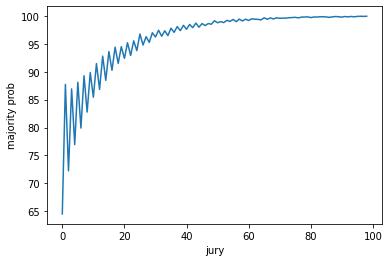

In [ ]:
#Make a graph of the probability of a correct decision for various sizes of the jury and diﬀerent competence levels (p)
#assumption: changing the size of jury size
p = 0.65
props = []
for jury in range(1 , 100):
  max_sim = 10000
  correct_sim = 0

  for i in range(max_sim):
    r = np.random.rand(jury)
    correct_ans = 0
    for j in range(jury):
      if r[j] >= 1-p:
          correct_ans += 1
      
    if correct_ans >= (jury)/2.0:
      correct_sim += 1

  props.append(100 * correct_sim / max_sim)    

plt.plot(props)
plt.xlabel('the number of people in the jury')
plt.ylabel('majority voting probability')

The incremental graph indicates the power of more individuals in the jury with the same level of correct diagnosis chance.

###Answer.2.c.2.

Text(0, 0.5, 'majority prob')

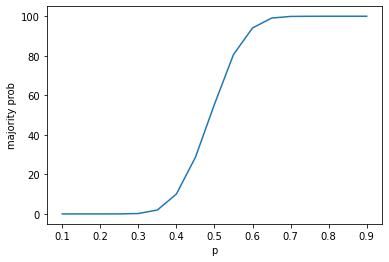

In [ ]:
#assumption: changing the amount of cahnce of diagnosis 
jury = 50
props = []
for p in np.arange(0.1 , 0.95 , 0.05):
  max_sim = 10000
  correct_sim = 0

  for i in range(max_sim):
    r = np.random.rand(jury)
    correct_ans = 0
    for j in range(jury):
      if r[j] >= 1-p:
          correct_ans += 1
      
    if correct_ans >= (jury)/2.0:
      correct_sim += 1

  props.append(100 * correct_sim / max_sim)    

plt.plot(np.arange(0.1 , 0.95 , 0.05) ,  props)
plt.xlabel('p')
plt.ylabel('majority prob')



The sigmoidal Graph shows with a fixed number of individuals as jury, in the probability of diagnosis less than random (<0.5) even the jury cannot conclude an acceptable result. However, if the chance of correct diagnosis is higher than 0.5, the correct decision would be much better.

###Answer.2.d.1.

As below is proved, the highest probability to make the right decision belongs to the group of students.

In [ ]:
#Who has the highest chance to make the correct decision
radg_correct_ans = 0.85
#doctors
doc_correct_sim = 0
for i in range(max_sim):
  r = np.random.rand(3)
  docs_correct_ans = 0
  for j in range(3):
    if r[j] >= 0.25:
        docs_correct_ans += 1
  if docs_correct_ans > 1:  #majority
    doc_correct_sim += 1
props_doc = 100 * doc_correct_sim / max_sim
#students
stu_correct_sim = 0
for i in range(max_sim):
  r = np.random.rand(31)
  stu_correct_ans = 0
  for j in range(31):
    if r[j] >= 0.40:
        stu_correct_ans += 1
  if stu_correct_ans > 15:  #majority
    stu_correct_sim += 1
props_stu = 100 * stu_correct_sim / max_sim

print('the chance of correct answer radiologist:', str(radg_correct_ans))
print('the chance of correct answer doctors:', str(props_doc))
print('the chance of correct answer students:', str(props_stu))

the chance of correct answer radiologist: 0.85
the chance of correct answer doctors: 84.3869
the chance of correct answer students: 87.1655


###Answer.2.d.2.

The answer is 25.

In [ ]:
#How big does the group of students equal to the prediction of the group of doctors?
for i in range(2, 31):
  stu_correct_sim = 0
  for k in range(max_sim):
    r = np.random.rand(i)
    stu_correct_ans = 0
    for j in range(i):
      if r[j] >= 0.40:
        stu_correct_ans += 1
    if stu_correct_ans > (i/2.0):  #majority
      stu_correct_sim += 1
  prop_min_stu = 100 * stu_correct_sim / max_sim
  if prop_min_stu > props_doc: #he prediction of the group of doctors is almost 84.38
    break
print('The minimum number of students:', str(i))


The minimum number of students: 25


###Answer.2.e.

Yes. Although the probability of correct decision-making per student is 0.6 individually, the ensembling (in this case, majority voting) causes the chance of faults to go to zero by half of the students at the same time.

##Exercise3

Answer.3.a.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p = 0.6
props = []
max_sim = 10000
correct_sim = 0
for i in range(max_sim):
  r = np.random.rand(10)
  correct_ans = 0
  for j in range(10):
    if r[j] >= 1-p:
        correct_ans += 1
  if correct_ans >= (10)/2.0:
    correct_sim += 1
print("The weak classifiers would reach " + str(100 * correct_sim / max_sim))

p = 0.75
props = []
max_sim = 10000
correct_sim_2 = 0
for i in range(max_sim):
  r = np.random.rand(1)
  correct_ans = 0
  for j in range(1):
    if r[j] >= 1-p:
        correct_ans += 1
  if correct_ans >= (1)/2.0:
    correct_sim_2 += 1
print("Strong classifier has a value of " + str(100 * correct_sim_2 / max_sim))
print("They together should give a value around " + str((correct_sim + correct_sim_2)/200))
print("This shows that the combined value is better than that of the strong classifier alone")

The weak classifiers would reach 82.67
Strong classifier has a value of 74.89
They together should give a value around 78.78
This shows that the combined value is better than that of the strong classifier alone


Answer.3.b.

##Exercise4

Boostrap sampling (also called bagging) is a method of splitting the data into parts with replacement and giving them to different models, combining the results at the end. Random subspace on the other hand does not split the data by groups of instances but rather into groups of features, again sending the different features to different models and combining the results at the end. Boosting uses a different approach by adding weights. The data goes through multiple classifiers and is then weighted depending on was it correctly classified or not (falsy classified data gets higher scores so that next time the classifiers can focus on them more).

##Exercise5

     age  sex  cp  trtbps  chol  fbs  ...  exng  oldpeak  slp  caa  thall  output
0     63    1   3     145   233    1  ...     0      2.3    0    0      1       1
1     37    1   2     130   250    0  ...     0      3.5    0    0      2       1
2     41    0   1     130   204    0  ...     0      1.4    2    0      2       1
3     56    1   1     120   236    0  ...     0      0.8    2    0      2       1
4     57    0   0     120   354    0  ...     1      0.6    2    0      2       1
..   ...  ...  ..     ...   ...  ...  ...   ...      ...  ...  ...    ...     ...
298   57    0   0     140   241    0  ...     1      0.2    1    0      3       0
299   45    1   3     110   264    0  ...     0      1.2    1    0      3       0
300   68    1   0     144   193    1  ...     0      3.4    1    2      3       0
301   57    1   0     130   131    0  ...     1      1.2    1    1      3       0
302   57    0   1     130   236    0  ...     0      0.0    1    1      2       0

[303 rows x 14 

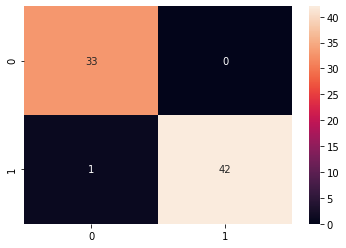

In [ ]:
# Importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sn

data = pd.read_csv('heart.csv')
print(data)
X = data.iloc[:, 0:13].values 
y = data.iloc[:, 13:].values
y = [i[0] for i in y]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

regressor = RandomForestClassifier(n_estimators = 10)
regressor.fit(X, y)
y_pred= regressor.predict(X_test)  

confusion_matrix = confusion_matrix(y_test, y_pred)
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

For our fifth task we decided to use the random forest classifier, specifically the sklearn implementation of it. We also used a popular dataset showing patient information, such as age and blood pressure, as well as had they suffered a heart attack or not. We successfully managed to reach a 100% accuracy on predicting future heart attacks. We split the data so that 75% was in the training and 25% in testing section. The model when using 1 estimator had an accuracy of about 80%. Around 8 estimators the accuracy reached as high as an average 98%.